In [1]:
import pandas as pd
import numpy as np
import json # Para trabajar con JSON
from pandas import json_normalize
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
#from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Descargar los stopwords en español e inglés
nltk.download('stopwords')
stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

# Configurar estilo de visualización
sns.set(style="whitegrid", palette="muted")
#plt.rcParams["figure.figsize"] = (12, 6)

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to C:\Users\JS
[nltk_data]     Digital\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
data_business = pd.read_pickle('D:/2024/HenryData/PF/Datos_Crudos/yelp/business.pkl')

In [35]:
data_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df_business = data_business.iloc[:, :14]

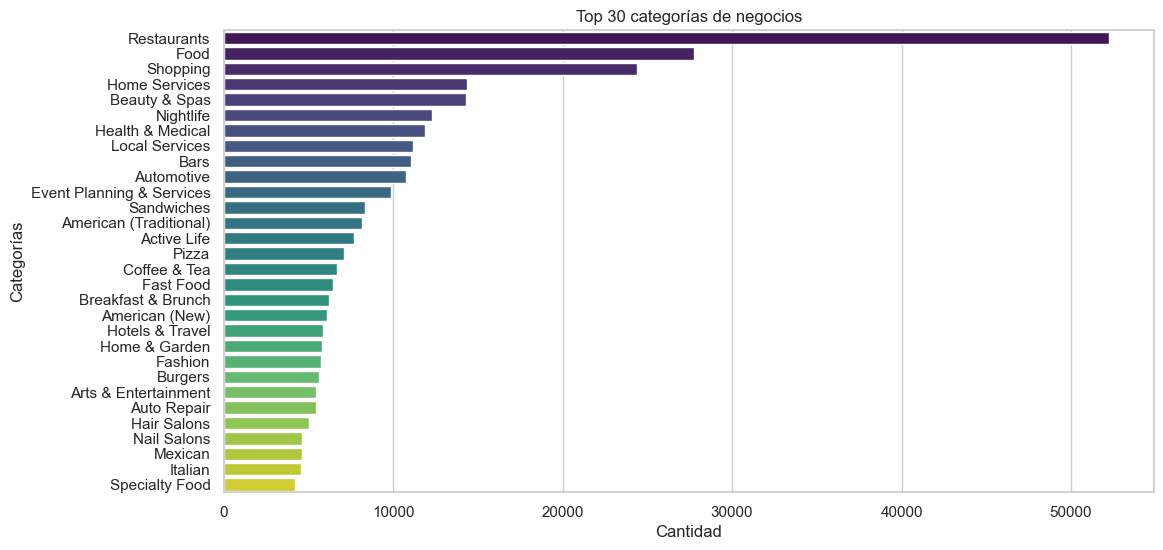

In [75]:
# Contar las categorías más comunes
df_business["categories"] = df_business["categories"].fillna("").apply(lambda x: x.split(", "))
categories = df_business["categories"].explode().value_counts().head(30)

# Visualizar las categorías más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=categories.values, y=categories.index, palette="viridis")
plt.title("Top 30 categorías de negocios")
plt.xlabel("Cantidad")
plt.ylabel("Categorías")
plt.show()

In [89]:
categoria_restaurante = {
    'restaurante argentino': ['argentine', 'argentinian', 'argentinian restaurant'],
    'restaurante mexicano': ['mexican', 'mexican restaurant', 'burrito', 'taco', 'pozole', 'Oaxacan'],
    'restaurante colombiano': ['colombian', 'colombian restaurant'],
    'restaurante peruano': ['peruvian', 'peruvian restaurant'],
    'restaurante brasileño': ['brazilian', 'brazilian restaurant'],
    'restaurante cubano': ['cuban', 'cuban restaurant'],
    'restaurante venezolano': ['venezuelan', 'venezuelan restaurant'],
    'restaurante chileno': ['chilean', 'chilean restaurant'],
    'restaurante ecuatoriano': ['ecuadorian', 'ecuadorian restaurant'],
    'restaurante dominicano': ['dominican', 'dominican restaurant'],
    'restaurante centroamericano': ['honduran', 'guatemalan', 'nicaraguan', 'panamanian', 'salvadoran', 'costarican', 'costa rican restaurant', 'honduran restaurant'],
    'restaurante caribeño': ['caribbean', 'caribbean restaurant'],
    'restaurante latinoamericano': ['latin american food', 'latin american', 'south american', 'latin', 'hispanic', 'south american restaurant'],
    'restaurante boliviano': ['bolivian', 'bolivian restaurant'],
    'restaurante paraguayo': ['paraguayan', 'paraguayan restaurant'],
    'restaurante uruguayo': ['uruguayan', 'uruguayan restaurant'],
    'restaurante puertorriqueño': ['puerto rican', 'puerto rican restaurant']
}

# Función para categorizar los restaurantes
def categorizar_restaurante(categoria):
    if isinstance(categoria, str):  # Verificar que la categoría es una cadena
        for categoria_nombre, keywords in categoria_restaurante.items():
            if any(keyword.lower() in categoria.lower() for keyword in keywords):
                return categoria_nombre
    return 'otros'  # Si no coincide con ninguna categoría o no es cadena, clasificar como 'otros'

In [90]:
# Aplicar la función a la columna 'categories' para crear una nueva columna 'restaurante_categoria'
df_business['restaurante_categoria'] = df_business['categories'].apply(categorizar_restaurante)

# Verificar las primeras filas con la nueva columna
print(df_business[['name', 'categories', 'restaurante_categoria']].head())

                       name  \
0  Abby Rappoport, LAC, CMQ   
1             The UPS Store   
2                    Target   
3        St Honore Pastries   
4  Perkiomen Valley Brewery   

                                          categories restaurante_categoria  
0  Doctors, Traditional Chinese Medicine, Naturop...                 otros  
1  Shipping Centers, Local Services, Notaries, Ma...                 otros  
2  Department Stores, Shopping, Fashion, Home & G...                 otros  
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...                 otros  
4                          Brewpubs, Breweries, Food                 otros  


In [91]:
# Análisis detallado del DataFrame
# 1. Contar el número de restaurantes por categoría
conteo_categorias = df_business['restaurante_categoria'].value_counts()
print("\nConteo por categoría:")
print(conteo_categorias)


Conteo por categoría:
restaurante_categoria
otros                          144419
restaurante mexicano             4611
restaurante caribeño              471
restaurante cubano                256
restaurante latinoamericano       204
restaurante brasileño             118
restaurante peruano                69
restaurante colombiano             59
restaurante venezolano             39
restaurante centroamericano        38
restaurante argentino              34
restaurante dominicano             28
Name: count, dtype: int64


In [92]:

# 2. Filtrar solo los restaurantes latinos para análisis adicional
restaurantes_latinos = df_business[df_business['restaurante_categoria'] != 'otros']

In [93]:
restaurantes_latinos.shape

(5927, 15)

In [94]:
# 3. Mostrar las ciudades con más restaurantes latinos
ciudades_populares = restaurantes_latinos['city'].value_counts().head(10)
print("\nTop 10 ciudades con más restaurantes latinos:")
print(ciudades_populares)



Top 10 ciudades con más restaurantes latinos:
city
Tucson           544
Tampa            522
Philadelphia     495
Indianapolis     433
Nashville        333
Reno             206
New Orleans      192
Saint Louis      157
Santa Barbara    138
Boise            115
Name: count, dtype: int64


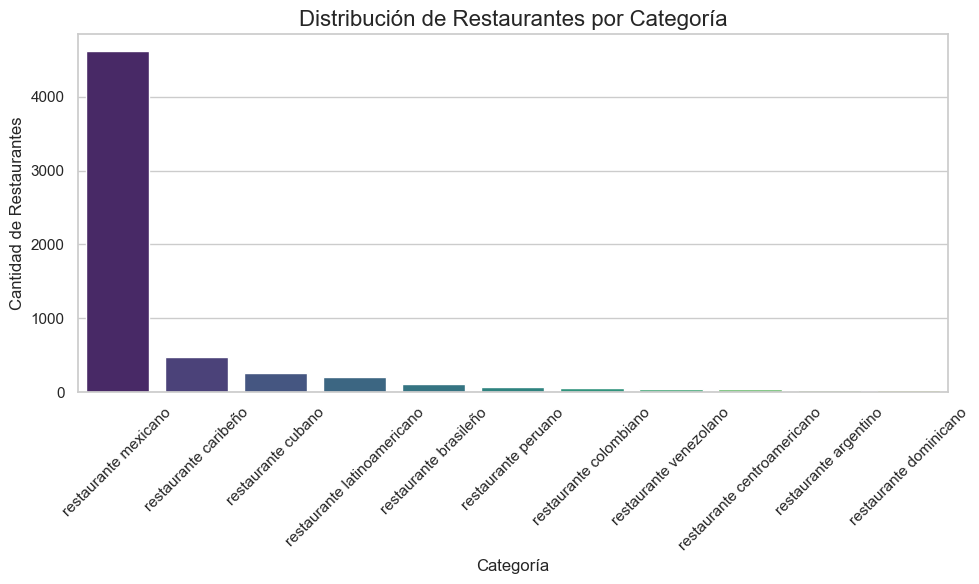

In [95]:
# 4. Graficar la distribución de restaurantes latinos por categoría
plt.figure(figsize=(10, 6))
sns.barplot(x=(restaurantes_latinos['restaurante_categoria'].value_counts()).index, y=(restaurantes_latinos['restaurante_categoria'].value_counts()).values, palette="viridis")
plt.title("Distribución de Restaurantes por Categoría", fontsize=16)
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Cantidad de Restaurantes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Promedio de estrellas por categoría:
restaurante_categoria
restaurante venezolano          4.24359
restaurante brasileño          4.207627
restaurante argentino          4.147059
restaurante centroamericano    4.131579
restaurante colombiano         4.067797
restaurante peruano            4.036232
restaurante cubano             3.972656
restaurante dominicano         3.964286
restaurante latinoamericano    3.865196
restaurante caribeño           3.834395
restaurante mexicano           3.516049
Name: stars, dtype: object


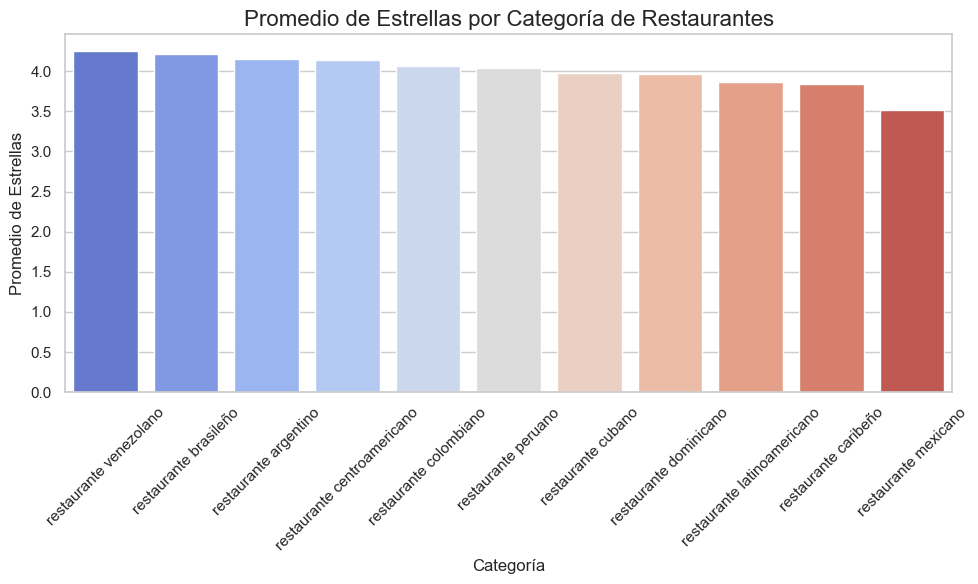

In [96]:
# 5. Analizar la relación entre estrellas y categorías
categoria_estrellas = restaurantes_latinos.groupby('restaurante_categoria')['stars'].mean().sort_values(ascending=False)
print("\nPromedio de estrellas por categoría:")
print(categoria_estrellas)
# Graficar la relación
plt.figure(figsize=(10, 6))
sns.barplot(x=categoria_estrellas.index, y=categoria_estrellas.values, palette="coolwarm")
plt.title("Promedio de Estrellas por Categoría de Restaurantes", fontsize=16)
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Promedio de Estrellas", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Asegurarse de que la columna 'categories' no tenga valores NaN y sea tipo string
df_business['categories'] = df_business['categories'].fillna('').astype(str)

# Lista de palabras clave relacionadas con restaurantes latinos
palabras_clave_latinos = [
    "Mexican", "Latin", "Cuban", "Peruvian", "Puerto Rican", 
    "Dominican", "Salvadoran", "Colombian", "Venezuelan", 
    "Argentine", "Brazilian", "Chilean", "Honduran", "Guatemalan"
]

# Filtrar restaurantes latinos
df_restaurantes_latinos = df_business[df_business['categories'].str.contains('|'.join(palabras_clave_latinos), case=False, na=False)]

# Mostrar resultados
print(f"Total de restaurantes latinos encontrados: {len(df_restaurantes_latinos)}")
print(df_restaurantes_latinos[['name', 'city', 'state', 'categories']].head())

Total de restaurantes latinos encontrados: 5570
                       name         city state  \
104     Taqueria Los Primos   Wilmington    IN   
153  Chipotle Mexican Grill        Largo    IN   
159          Cerveza Jack's    Nashville    ID   
278          Las Margaritas  New Orleans    FL   
290       Taqueria El Sitio    Hermitage    FL   

                                categories  
104                   Mexican, Restaurants  
153        Mexican, Fast Food, Restaurants  
159  Nightlife, Restaurants, Bars, Mexican  
278                   Mexican, Restaurants  
290   Latin American, Mexican, Restaurants  


In [9]:
df_restaurantes_latinos.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
104,Dy91wdWkwtI_qgjAIZ0Niw,Taqueria Los Primos,3322 Old Capitol Trl,Wilmington,IN,19808,39.732089,-75.625673,4.0,23,1,"{'BusinessAcceptsCreditCards': 'True', 'HasTV'...","Mexican, Restaurants",None
153,aNtKyc2rr-uK5cqzY9TVQQ,Chipotle Mexican Grill,10160 Ulmerton Rd,Largo,IN,33771,27.894167,-82.779866,3.0,19,1,"{'RestaurantsPriceRange2': '1', 'Caters': 'Tru...","Mexican, Fast Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '10:45-22:0',..."
159,X_E7U2lVNEwbH_gpOBmAHQ,Cerveza Jack's,135 2nd Ave N,Nashville,ID,37201,36.162799,-86.776016,4.0,182,1,"{'GoodForDancing': 'True', 'Smoking': 'u'no'',...","Nightlife, Restaurants, Bars, Mexican","{'Monday': '0:0-0:0', 'Wednesday': '11:0-22:0'..."
278,W57cR9a7XP6RX56MSWHJJA,Las Margaritas,514 S Rampart St,New Orleans,FL,70163,29.95029,-90.074887,3.5,58,0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Tru...","Mexican, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
290,xa6JYHDgVza7CuenKBJBHw,Taqueria El Sitio,3466 A Lebanon Pike,Hermitage,FL,37076,36.191654,-86.625419,4.5,8,0,"{'GoodForKids': 'True', 'RestaurantsReservatio...","Latin American, Mexican, Restaurants","{'Tuesday': '10:0-21:0', 'Wednesday': '17:30-2..."
345,XwoXi0M66RU6Gouq-DSDHw,G Peppers Grill & Tavern,8745 Gunn Hwy,Odessa,FL,33556,28.092136,-82.578574,4.0,82,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Mexican, American (Traditional)","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
348,OfW-VK04qr7b7bPm5QbyLg,Taqueria Feliz,303 Horsham Rd,Horsham,FL,19044,40.180727,-75.134699,3.0,77,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Mexican, Pizza, Restaurants","{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:..."
351,0DbIUh_Xuj6H5B_SF0RLCQ,Iguana's Mexican Restaurant,"680 E 56th St, Ste A",Brownsburg,PA,46112,39.851862,-86.384758,4.0,74,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Mexican","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
401,4xhGQGdGqU60BIznBjqnuA,California Tacos and Taproom,956 Embarcadero Del Norte,Isla Vista,IN,93117,34.411555,-119.855077,4.0,49,0,"{'Music': '{'dj': False, 'background_music': F...","Mexican, Beer Bar, Bars, Sports Bars, Nightlif...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-22:0', ..."
408,Rz0KfP7YAZV_yQE8uIB0fg,El Sabor Boricua,11612 N Nebraska Ave,Tampa,LA,33612,28.053515,-82.453442,5.0,6,0,"{'RestaurantsDelivery': 'True', 'RestaurantsPr...","Puerto Rican, Caribbean, Latin American, Resta...","{'Wednesday': '11:0-15:0', 'Thursday': '11:0-1..."


In [97]:
df_restaurantes_latinos['city'].unique()

array(['Wilmington', 'Largo', 'Nashville', 'New Orleans', 'Hermitage',
       'Odessa', 'Horsham', 'Brownsburg', 'Isla Vista', 'Tampa',
       'Saint Louis', 'Goleta', 'St. Louis', 'Tucson', 'Saint Charles',
       'Saint Petersburg', 'Sparks', 'Madeira Beach', 'Media', 'Edmonton',
       'Port Richey', 'Sicklerville', 'Indianapolis', 'Zionsville',
       'Seminole', 'Boise', 'Springfield', 'East Norriton', 'Lansdale',
       'Old Hickory', 'Palm Harbor', 'Pitman', 'Reno', 'Philadelphia',
       'Pinellas Park', 'Avon', 'Brentwood', 'Cahokia', 'West Chester',
       'Clearwater', "Land O' Lakes", 'Metairie', 'Santa Barbara',
       'Holiday', 'Prospect Park', 'Lebanon', 'Chalfont', 'Camden',
       'Clearwater Beach', 'King of Prussia', 'Plainfield', 'Seffner',
       'Gulfport', 'Alton', 'Cherry Hill', 'Valrico', 'Collinsville',
       'Meridian', 'Fishers', 'Gilbertsville', 'Garden City', 'Marlton',
       'ST. Louis', 'Sherwood Park', 'New Hope', 'Bordentown', 'Smyrna',
       'Clem

In [107]:
# Diccionario inicial de ciudades y sus estados (algunos ejemplos comunes)
ciudades_a_estados = {
    'Wilmington': 'DE',
    'Largo': 'FL',
    'Nashville': 'TN',
    'New Orleans': 'LA',
    'Tampa': 'FL',
    'Saint Louis': 'MO',
    'Goleta': 'CA',
    'Tucson': 'AZ',
    'Santa Barbara': 'CA',
    'Reno': 'NV',
    'Philadelphia': 'PA',
    'Indianapolis': 'IN',
    'St. Louis': 'MO',
    'Metairie': 'LA',
    'Clearwater': 'FL',
    'Springfield': 'MO',  # Springfield puede estar en varios estados
    'Newark': 'NJ',  
    'Affton': 'MO',           # Missouri
    'Green Lane': 'PA',       # Pennsylvania
    'Ashland City': 'TN',     # Tennessee
    'Brentwood': 'TN',        # Tennessee (puede ser CA, revisa su frecuencia)
    'St. Petersburg': 'FL',   # Florida
    "Land O' Lakes": 'FL',    # Florida
    'Tampa Bay': 'FL',        # Florida
    'Kenner': 'LA',           # Louisiana
    'Edmonton': 'AB',         # Alberta (Canadá, posible exclusión)
    'Newtown': 'PA',          # Pennsylvania (verificar otras opciones)
    'White House': 'TN',      # Tennessee
    'Boise': 'ID',            # Idaho
    'Paoli': 'PA',            # Pennsylvania
    'Ardmore': 'PA',          # Pennsylvania
    'Exton': 'PA',            # Pennsylvania
    'Edwardsville': 'IL',     # Illinois
    'Sparks': 'NV',           # Nevada
    'Alton': 'IL',            # Illinois
    'Cherry Hill': 'NJ',      # New Jersey
    'Bala Cynwyd': 'PA',      # Pennsylvania 
    'Belleville': 'IL',       # Illinois (puede haber homónimos, verifica la frecuencia)
    'Carmel': 'IN',           # Indiana (frecuente en este contexto)
    'Kennett Square': 'PA',   # Pennsylvania
    'Plymouth Meeting': 'PA', # Pennsylvania
    'Harvey': 'LA',           # Louisiana
    'West Chester': 'PA',     # Pennsylvania
    'Meridian': 'MS',         # Mississippi (podría ser Idaho, revisar datos)
    'Hudson': 'FL',           # Florida (varias Hudson, pero FL es la más probable)
    'Fernley': 'NV',          # Nevada
    'Williamstown': 'NJ',     # New Jersey
    'Pinellas Park': 'FL',    # Florida
    'Glenolden': 'PA',        # Pennsylvania
    'Wesley Chapel': 'FL',    # Florida
    'Fishers': 'IN',          # Indiana
    'Burlington': 'VT',       # Vermont (puede haber en otros estados, verifica frecuencia)
    'Troy': 'NY',             # Nueva York (varios Troy, verifica la más común)
    'Camden': 'NJ',           # New Jersey
    'Plainfield': 'IL',       # Illinois (puede haber en NJ y otros estados)
    'Bensalem': 'PA',         # Pennsylvania
    'Maplewood': 'NJ',        # New Jersey    # Newark también puede estar en varios estados
    # Agregar más ciudades según sea necesario
}

In [108]:
def asignar_estado(ciudad, diccionario_ciudades):
    """Devuelve la abreviatura del estado según la ciudad."""
    return diccionario_ciudades.get(ciudad, "Desconocido")

# Aplicar la función al DataFrame
df_business['state1'] = df_business['city'].apply(lambda x: asignar_estado(x, ciudades_a_estados))

# Verificar los resultados
print(df_business[['city', 'state', 'state1']].head(10))

             city state state1
0   Santa Barbara   NaN     CA
1          Affton   NaN     MO
2          Tucson   NaN     AZ
3    Philadelphia    CA     PA
4      Green Lane    MO     PA
5    Ashland City    AZ     TN
6       Brentwood    PA     TN
7  St. Petersburg    PA     FL
8          Affton    TN     MO
9       Nashville    MO     TN


In [109]:
# Identificar y mostrar las ciudades sin estado asignado
ciudades_sin_estado = df_business[df_business['state1'] == "Desconocido"]['city'].unique()
print(f"Total de ciudades sin estado asignado: {len(ciudades_sin_estado)}")
print(ciudades_sin_estado[:20])  # Mostrar las primeras 20

Total de ciudades sin estado asignado: 1359
['Fairview Heights' 'Oro Valley' 'Treasure Island' 'Southampton'
 'Chalfont' 'Willow Grove' 'Voorhees' 'Tarpon Springs' 'Blue Bell'
 'Woodbury' 'Brownsburg' 'Norristown' 'Land O Lakes' 'Greenwood'
 'Saint Petersburg' 'Brookhaven' 'Haverford' 'Glenside' 'Moorestown'
 'Madison']


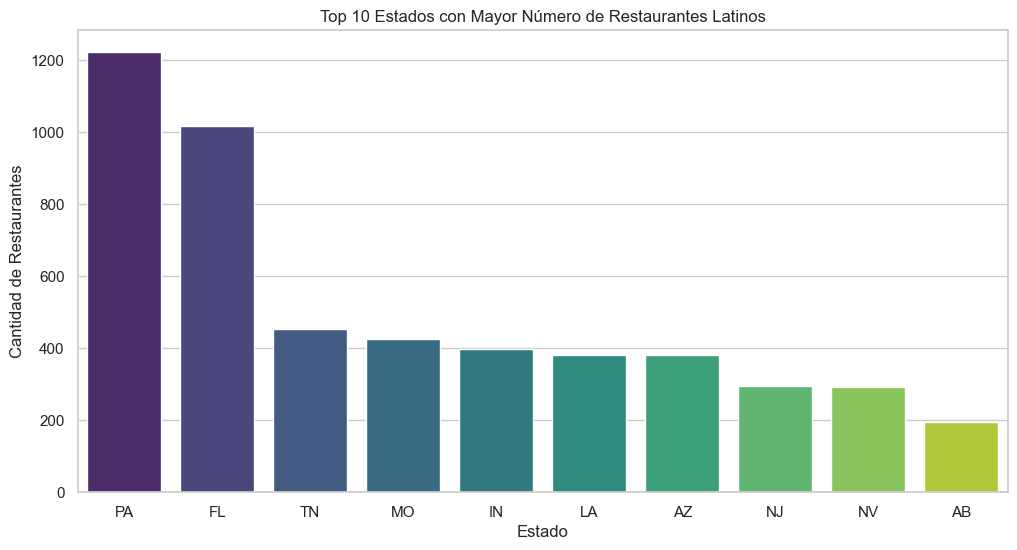

In [10]:

# Contar restaurantes por estado
restaurantes_por_estado = df_restaurantes_latinos['state'].value_counts().reset_index()
restaurantes_por_estado.columns = ['state', 'count']

# Visualizar
plt.figure(figsize=(12, 6))
sns.barplot(data=restaurantes_por_estado.head(10), x='state', y='count', palette='viridis')
plt.title("Top 10 Estados con Mayor Número de Restaurantes Latinos")
plt.xlabel("Estado")
plt.ylabel("Cantidad de Restaurantes")
plt.show()

In [ ]:
#df_restaurantes_latinos.to_csv('D:/2024/HenryData/PF/Datos_Crudos/yelp/restaurantes_latinos.csv', index=False)
#D:\2024\HenryData\PF\Datos_Crudos\yelp